---
title: Solving Nonlinear Problems with Scipy Optimize and pyCMA
type: submodule
---

# Solving Nonlinear Problems with Scipy Optimize and pyCMA

## Introduction

Nonlinear solvers can suffer from the possibility of reaching local minima if the initial guess is too far away from the best minimum solution.  This is especially true when trying to fit nonlinear functions.  This example contrasts the difference between the scipy optimize function and the pyCMA package.

The pyCMA package provides python with an implementation of the "covariance matrix adaptation evolutionary strategy" (wikipedia page [here](https://en.wikipedia.org/wiki/CMA-ES)).  You can install the pycma package from the command line by executing ```pip install cma```.

In [1]:
%matplotlib inline

Import all necessary packages

In [2]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import numpy.random
import cma

create a function for plotting solutions against the input data

In [3]:
def plot_params(parameters):
    w,w0 = parameters
    y_model = numpy.sin(w*x-w0)
    p = plt.plot(x,y_model,'r-.')
    p = plt.plot(x,y_data,'bo')
    return p

create the x array

In [4]:
x = numpy.r_[-10:10:.1]

define your model parameters

In [5]:
parameters = (2.1,.24)

split model parameters into frequency and frequency offset

In [6]:
w,w0 = parameters

Build the original model as a sine function.  This is ideal because you can reach many local minima as a function of $\omega$ and $\omega_0$

In [7]:
y = numpy.sin(w*x-w0)

Add some random noise

In [8]:
rand = numpy.random.randn(*y.shape)/10
y_data = y+rand

And plot the model data with noise against the original model

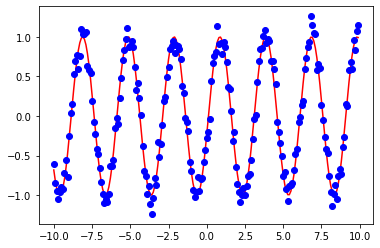

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
a=ax.plot(x,y,'r')
b=ax.plot(x,y_data,'bo')


Now create a function that returns the sum of squared error between a model guess and the original model data

In [10]:
def myfunc(parameters):
    w,w0 = parameters
    y_model = numpy.sin(w*x-w0)
    error = ((y_model-y_data)**2).sum()
    return error

Now find out the error of the actual model against its own noise;

In [11]:
myfunc([2.1,.24])

2.3855951073161688

Now define an initial guess for the solver to try to find the parameters itself

In [12]:
ini = [1,1]

In [13]:
sol = scipy.optimize.minimize(myfunc,ini)
sol.fun

190.07064566371594

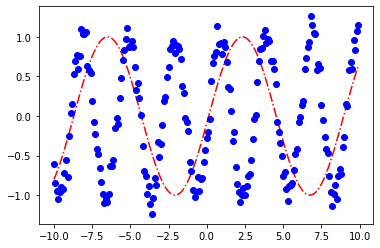

In [14]:
plot_params(sol.x)

Now rerun with a much closer initial guess

2.3560305442401464


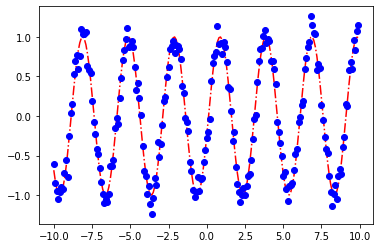

In [15]:
ini = [2,1]
sol = scipy.optimize.minimize(myfunc,ini)
print(sol.fun)
plot_params(sol.x)

## CMA example

Now we're going to try with pyCMA and the original initial guess

In [16]:
ini = [1,1]

Run the optimization and display the results at the end.

In [17]:
es = cma.CMAEvolutionStrategy(ini, 0.5)
es.logger.disp_header()
while not es.stop():
      X = es.ask()
      es.tell(X, [myfunc(x) for x in X])
      es.logger.add()
es.logger.disp([-1])

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=160127, Wed Dec 16 11:11:28 2020)
Iterat Nfevals  function value    axis ratio maxstd  minstd
   89    534 2.35603054423994e+00 4.1e+00 8.97e-10 2.46e-10


Plot the convergence of the CMA-ES algorithm

C:\Anaconda3\lib\site-packages\cma\logger.py:874: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  color = iter(pyplot.cm.cmap_d['plasma_r'](np.linspace(0.35, 1,


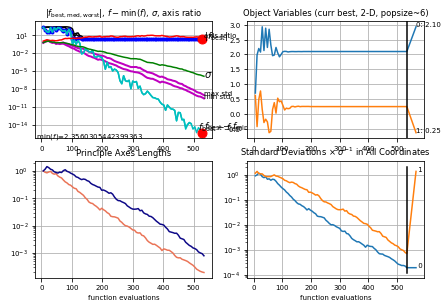

In [18]:
es.logger.plot()

In [19]:
es.best.x

array([2.09823899, 0.25389465])

In [20]:
myfunc(es.best.x)

2.3560305442399363

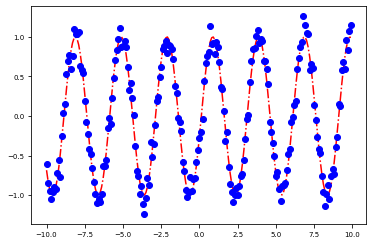

In [21]:
plot_params(es.best.x)

If you re-run this optimization, even with the same initial guess, there is no guarantee of convergence, especially when your initial guess is far away from the actual value.  This is because the success of the algorithm, as well as its ability to reach beyond local minima, is based on injecting randomness into each evolution of the algorithm.  This means that each optimization will produce slightly different results in a different number of steps.  This must be traded off for the ability to escape local minima.